In [8]:
import pandas as pd
data = pd.read_csv('D:/ruanjian/streetview/Image Segmentation/PSPNet-tensorflow-master/csvv/NKDEcsv.csv')
 
# display the first 5 rows
data.head()



,Lat,Lon,SKY,VEGETATION,BUILDING,ROAD,SIDEWALK,VEHICLE,airplane,animal,...,luojia_500m,luojia_1000m,cd_pedes_6-18,cd_pedes_18-6,cd_pedes_7-9,cd_pedes_17-19,cd_vehicle_6-18,cd_vehicle_18-6,cd_vehicle_7-9,cd_vehicle_17-19
0,31.185192,121.353265,0.286612,0.056279,0.358995,0.140494,0.045279,0.021103,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,31.185328,121.353403,0.042576,0.025816,0.052502,0.152508,0.015968,0.037373,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31.185574,121.353618,0.624538,0.027900,0.056335,0.114882,0.003818,0.061256,0.000000,0.0,...,0.001452,0.001157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31.185791,121.353779,0.370363,0.130409,0.259035,0.141152,0.010732,0.019369,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,31.185981,121.353202,0.232677,0.085006,0.122082,0.085225,0.002320,0.070560,0.000673,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


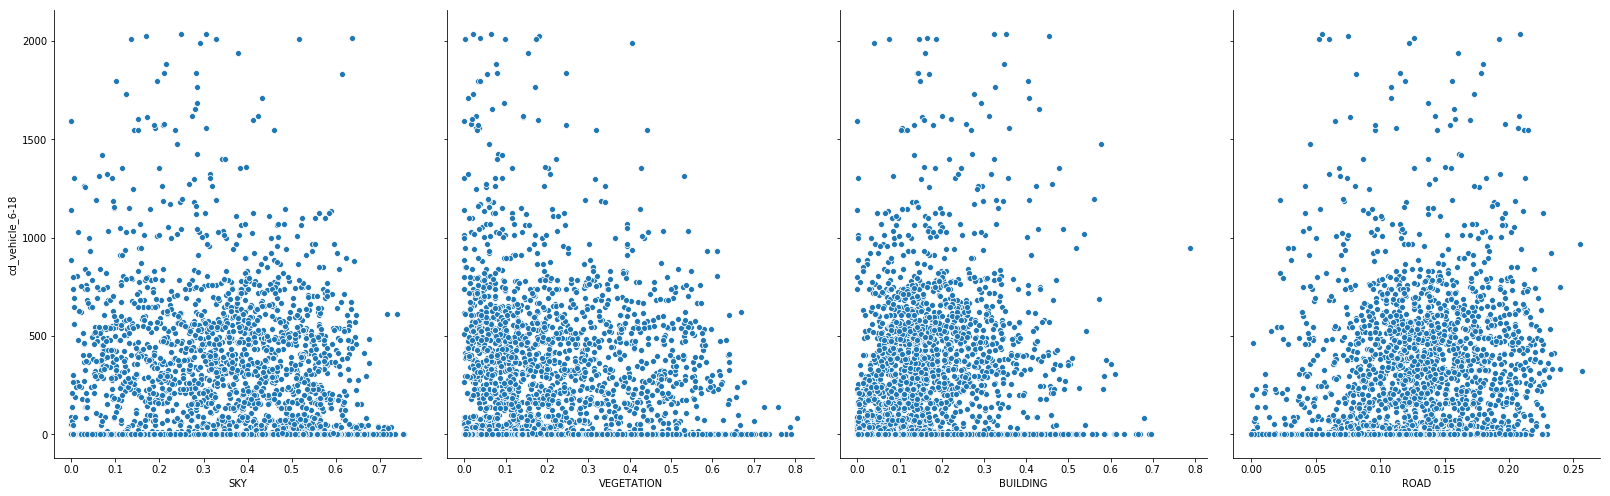

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['SKY','VEGETATION','BUILDING','ROAD'], y_vars='cd_vehicle_6-18', height=7, aspect=0.8)
plt.show()


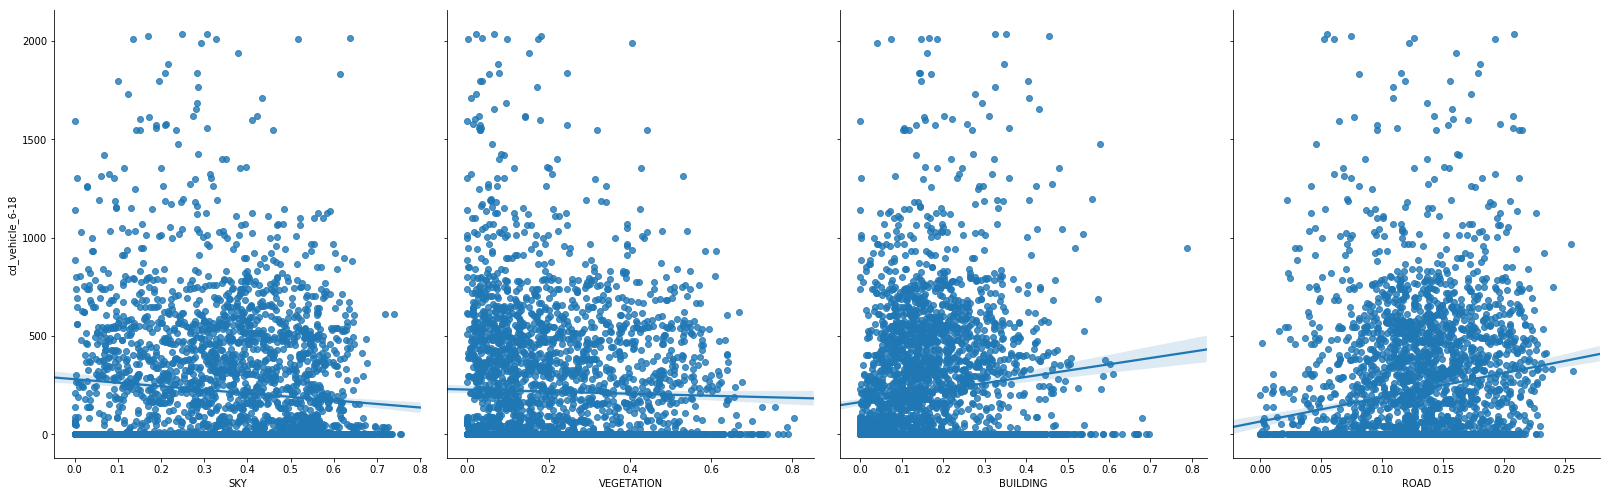

In [12]:
sns.pairplot(data, x_vars=['SKY','VEGETATION','BUILDING','ROAD'], y_vars='cd_vehicle_6-18', height=7, aspect=0.8, kind='reg')
plt.show()


In [14]:
#create a python list of feature names
feature_cols = ['SKY','VEGETATION','BUILDING','ROAD']
# use the list to select a subset of the original DataFrame
X = data[feature_cols]
# equivalent command to do this in one line
X = data[['SKY','VEGETATION','BUILDING','ROAD']]
# print the first 5 rows
print (X.head())
# check the type and shape of X
print (type(X))
print (X.shape)


        SKY  VEGETATION  BUILDING      ROAD
0  0.286612    0.056279  0.358995  0.140494
1  0.042576    0.025816  0.052502  0.152508
2  0.624538    0.027900  0.056335  0.114882
3  0.370363    0.130409  0.259035  0.141152
4  0.232677    0.085006  0.122082  0.085225
<class 'pandas.core.frame.DataFrame'>
(3377, 4)


In [18]:
# select a Series from the DataFrame
y = data['cd_vehicle_6-18']
# equivalent command that works if there are no spaces in the column name
y = data.cd_vehicle_6-18
# print the first 5 values
print (y.head())


SyntaxError: invalid syntax (<ipython-input-18-26cf84dd2aa7>, line 4)

In [21]:
from sklearn.model_selection import train_test_split  #这里是引用了交叉验证
X_train,X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(2532, 4)
(2532,)
(845, 4)
(845,)


In [22]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model=linreg.fit(X_train, y_train)
print (model)
print (linreg.intercept_)
print (linreg.coef_)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
41.401134215330984
[-320.92758479  -27.76787354  313.49340443 1945.64474377]


In [23]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

In [24]:
y_pred = linreg.predict(X_test)
print (y_pred)
print (type(y_pred))

[ 322.75110933  392.67722983  366.08674985  374.81030022  287.15901651
  301.69024928  153.24677988  228.27059261  187.58314512  178.47121576
  225.75210022  115.62154812  163.16576442  239.0176203   200.59709831
  347.01838137  283.11522684  -13.46073972  220.45153074   74.19673414
  102.82405465  408.847675    159.96100379  312.72308127   19.94802961
  233.60018472  275.7747908   339.23685474   34.27978494  279.66967002
  272.52801245  133.31071783  280.77837152  132.95049435  210.88098015
  181.18540164  216.40182113  171.09834681  241.65212654  277.64846273
  176.05466742  286.16690033  270.4156286   322.86562657  166.80097508
  161.83926479  280.4572969   307.55358816   94.32664531  151.27176726
  277.52092128  357.45716561  301.86717275  227.42269234  281.44982636
  117.03319877  197.85685548  285.83589697  158.04392659  222.44608109
  240.8357561   106.64057115  162.85293056  219.03074562  167.99549354
  105.68882189  301.23105484  167.99398752  212.84851811  338.86643403
  151.

In [25]:
print (type(y_pred),type(y_test))
print (len(y_pred),len(y_test))
print (y_pred.shape,y_test.shape)
from sklearn import metrics
import numpy as np
sum_mean=0
for i in range(len(y_pred)):
    sum_mean+=(y_pred[i]-y_test.values[i])**2
sum_erro=np.sqrt(sum_mean/50)
# calculate RMSE by hand
print ("RMSE by hand:",sum_erro)


<class 'numpy.ndarray'> <class 'pandas.core.series.Series'>
845 845
(845,) (845,)
RMSE by hand: 1406.1098017934203


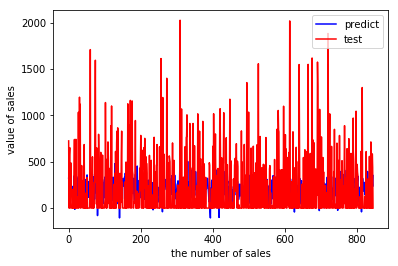

In [26]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(y_pred)),y_pred,'b',label="predict")
plt.plot(range(len(y_pred)),y_test,'r',label="test")
plt.legend(loc="upper right") #显示图中的标签
plt.xlabel("the number of sales")
plt.ylabel('value of sales')
plt.show()
